In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from scipy import stats
from scipy.stats import mannwhitneyu 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

def read_excel_folder(folder_path):
    all_files = glob.glob(os.path.join(folder_path, "*.xlsx"))
    if not all_files:
        return pd.DataFrame()

    all_df = []
    for f in all_files:
        df = pd.read_excel(f)
        all_df.append(df)

    combined_df = pd.concat(all_df, ignore_index=True)
    return combined_df

folder_path = '/Users/peiyuanlee/Downloads/Toxic Course Combo Data (301-315)'
final_df = read_excel_folder(folder_path)

In [2]:
final_df.head()

,term_code,subj_area_cd,crs_catlg_no,sect_no,course_dept_code,course_dept_title,course_div_code,course_div_title,course_org_code,course_org_title,...,actual_major_name,maj_dept_code,maj_dept_title,maj_div_code,maj_div_title,maj_org_code,maj_org_title,grade,std_course_gpa,deg_awd_term_code
0,301,GLBL ST,0001,1,1225,INTERDEPARTMENTAL DEGREE PROGRAMS,1460,INTERNATIONAL INSTITUTE,1400,INTERNATIONAL INSTITUTE,...,GLOBAL STUDIES,1225,INTERDEPARTMENTAL DEGREE PROGRAMS,1460,INTERNATIONAL INSTITUTE,1400,INTERNATIONAL INSTITUTE,A+,1.130962,306.0
1,301,GLBL ST,0001,1,1225,INTERDEPARTMENTAL DEGREE PROGRAMS,1460,INTERNATIONAL INSTITUTE,1400,INTERNATIONAL INSTITUTE,...,HISTORY,1130,HISTORY,1350,L&S SOCIAL SCIENCES,1300,LETTERS AND SCIENCE,A-,1.046140,303.0
2,301,GLBL ST,0001,1,1225,INTERDEPARTMENTAL DEGREE PROGRAMS,1460,INTERNATIONAL INSTITUTE,1400,INTERNATIONAL INSTITUTE,...,BUSINESS ECONOMICS,1100,ECONOMICS,1350,L&S SOCIAL SCIENCES,1300,LETTERS AND SCIENCE,A-,1.046140,308.0
3,301,GLBL ST,0001,1,1225,INTERDEPARTMENTAL DEGREE PROGRAMS,1460,INTERNATIONAL INSTITUTE,1400,INTERNATIONAL INSTITUTE,...,HUMAN BIOLOGY AND SOCIETY - BA,3022,INSTITUTE FOR SOCIETY AND GENETICS,1330,L&S LIFE SCIENCES,1300,LETTERS AND SCIENCE,A,1.130962,309.0
4,301,GLBL ST,0001,1,1225,INTERDEPARTMENTAL DEGREE PROGRAMS,1460,INTERNATIONAL INSTITUTE,1400,INTERNATIONAL INSTITUTE,...,ANTHROPOLOGY,1085,ANTHROPOLOGY,1350,L&S SOCIAL SCIENCES,1300,LETTERS AND SCIENCE,B+,0.933043,303.0


In [3]:
final_df.shape

(1288539, 35)

In [5]:
final_df.columns

Index(['term_code', 'subj_area_cd', 'crs_catlg_no', 'sect_no',
       'course_dept_code', 'course_dept_title', 'course_div_code',
       'course_div_title', 'course_org_code', 'course_org_title',
       'course_title', 'course_level', 'activity_type', 'online_flag',
       'ge_flag', 'diversity_course_req_flag', 'sect_enroll', 'student_id',
       'admit_level', 'student_level', 'unit_attempted', 'course_type',
       'major_code', 'major_name', 'actual_major_code', 'actual_major_name',
       'maj_dept_code', 'maj_dept_title', 'maj_div_code', 'maj_div_title',
       'maj_org_code', 'maj_org_title', 'grade', 'std_course_gpa',
       'deg_awd_term_code'],
      dtype='object')

In [6]:
final_df[final_df.duplicated()]
# no duplicates in data 

,term_code,subj_area_cd,crs_catlg_no,sect_no,course_dept_code,course_dept_title,course_div_code,course_div_title,course_org_code,course_org_title,...,actual_major_name,maj_dept_code,maj_dept_title,maj_div_code,maj_div_title,maj_org_code,maj_org_title,grade,std_course_gpa,deg_awd_term_code


In [7]:
df = final_df[final_df['actual_major_name'] == 'STATISTICS AND DATA SCIENCE']
df.head()

,term_code,subj_area_cd,crs_catlg_no,sect_no,course_dept_code,course_dept_title,course_div_code,course_div_title,course_org_code,course_org_title,...,actual_major_name,maj_dept_code,maj_dept_title,maj_div_code,maj_div_title,maj_org_code,maj_org_title,grade,std_course_gpa,deg_awd_term_code
576,301,COM HLT,0179,1,1920,COMMUNITY HEALTH SCIENCES,2410,PUBLIC HEALTH DIV,2400,UCLA FIELDING SCHOOL OF PUBLIC HEALTH,...,STATISTICS AND DATA SCIENCE,1015,STATISTICS AND DATA SCIENCE,1340,L&S PHYSICAL SCIENCES,1300,LETTERS AND SCIENCE,A,1.069723,305.0
780,301,AM IND,0010 M,1,1303,AMERICAN-INDIAN STUDIES,1350,L&S SOCIAL SCIENCES,1300,LETTERS AND SCIENCE,...,STATISTICS AND DATA SCIENCE,1015,STATISTICS AND DATA SCIENCE,1340,L&S PHYSICAL SCIENCES,1300,LETTERS AND SCIENCE,A,1.027084,305.0
806,301,ANTHRO,0002,1,1085,ANTHROPOLOGY,1350,L&S SOCIAL SCIENCES,1300,LETTERS AND SCIENCE,...,STATISTICS AND DATA SCIENCE,1015,STATISTICS AND DATA SCIENCE,1340,L&S PHYSICAL SCIENCES,1300,LETTERS AND SCIENCE,A+,1.201429,310.0
939,301,ANTHRO,0002,1,1085,ANTHROPOLOGY,1350,L&S SOCIAL SCIENCES,1300,LETTERS AND SCIENCE,...,STATISTICS AND DATA SCIENCE,1015,STATISTICS AND DATA SCIENCE,1340,L&S PHYSICAL SCIENCES,1300,LETTERS AND SCIENCE,A-,1.111322,309.0
1041,301,ANTHRO,0002,1,1085,ANTHROPOLOGY,1350,L&S SOCIAL SCIENCES,1300,LETTERS AND SCIENCE,...,STATISTICS AND DATA SCIENCE,1015,STATISTICS AND DATA SCIENCE,1340,L&S PHYSICAL SCIENCES,1300,LETTERS AND SCIENCE,D,0.300357,314.0


In [8]:
df.loc[576]

term_code                                                      301
subj_area_cd                                               COM HLT
crs_catlg_no                                                  0179
sect_no                                                          1
course_dept_code                                              1920
course_dept_title                        COMMUNITY HEALTH SCIENCES
course_div_code                                               2410
course_div_title                                 PUBLIC HEALTH DIV
course_org_code                                               2400
course_org_title             UCLA FIELDING SCHOOL OF PUBLIC HEALTH
course_title                                           LIFE SKILLS
course_level                                        Upper Division
activity_type                                              Seminar
online_flag                                                Regular
ge_flag                                                       

In [9]:
data_sorted = df.sort_values(by=['student_id', 'term_code'])[['student_id','term_code', 'ge_flag', 'crs_catlg_no', 'grade', 'admit_level', 'course_level', 'subj_area_cd']].reset_index(drop= True)
grade_point_scale = {"A+": 4.0 , 'A': 4.0, 'A-': 3.7, 'B+': 3.3, 'B': 3.0, "B-": 2.7, 'C+': 2.3, 'C': 2.0, "C-": 1.7, "D+": 1.3, 'D': 1.0, 'D-': 0.7, 'F': 0.0}
data_sorted['gpa'] = [grade_point_scale[i] for i in data_sorted['grade']]
data_sorted.head()

,student_id,term_code,ge_flag,crs_catlg_no,grade,admit_level,course_level,subj_area_cd,gpa
0,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,301,N,0177,C,Transfer,Upper Division,MATH,2.0
1,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,301,N,0100B,B,Transfer,Upper Division,STATS,3.0
2,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,301,N,0161L,A+,Transfer,Upper Division,ETHNMUS,4.0
3,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,302,N,0100C,B+,Transfer,Upper Division,STATS,3.3
4,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,302,N,0102A,B+,Transfer,Upper Division,STATS,3.3


In [10]:
temp_final_df = data_sorted.groupby(['student_id', 'term_code']).agg({'crs_catlg_no': list, 'grade': list, 'ge_flag': list, 'gpa': 'mean'}).reset_index()
temp_final_df.head()

,student_id,term_code,crs_catlg_no,grade,ge_flag,gpa
0,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,301,"[0177, 0100B, 0161L]","[C, B, A+]","[N, N, N]",3.000000
1,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,302,"[0100C, 0102A, 0101A]","[B+, B+, C+]","[N, N, N]",2.966667
2,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,303,"[0131A, 0102B]","[A, A-]","[N, N]",3.850000
3,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,304,"[0010B, 0101C, 0102C]","[A-, A, B+]","[N, N, N]",3.666667
4,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,305,"[0016A, 0141SL]","[B+, A]","[N, N]",3.650000


# TRANSFERS VS FRESHMAN ADMIT STATS STUDENTS

We want to compare the academic outcomes between transfer students and regular students. Thus, we only need the upper division statistics courses and the different electives that contribute to the statistics major.
The following electives are listed on the statistics major sheet:

Stats 112-199, Math 115A, Math 131A, Math 131B, Math 151A, Math 151B, Math 156, Math 170B,
Math 171, Math 177, Math 178A, Math 178B, Math 178C, Comm 153 or 188C, Digital Humanities 101, Econ 143,
Econ 144, Econ 147, Ecology and Evolutionary Biology C172, Psych 142H

In [11]:
# remove ges & lower division entries
df1 = data_sorted[(data_sorted['course_level'] == 'Upper Division') & (data_sorted['ge_flag'] == 'N')]

# get courses that contribute to stats major
stat_electives = ['MATH', 'STATS', 'COMM', 'DGT HUM', 'ECON', 'EE BIOL', 'PSYCH']
crs_no = {'ECON': ['0143', '0144', '0147'], 'DGT HUM': ['0101'], 'EE BIOL': ['0172  C'], 'COMM': ['0153', '0188C'], 'PSYCH': ['0142H']}

df1 = df1[df1['subj_area_cd'].isin(stat_electives)]
mask = df1.apply(lambda row: (row['subj_area_cd'] == 'STATS') or (row['subj_area_cd'] == 'MATH') or (row['subj_area_cd'] in crs_no and row['crs_catlg_no'] in crs_no[row['subj_area_cd']]), axis=1)
df_transfer = df1[mask]


In [12]:
df_transfer

,student_id,term_code,ge_flag,crs_catlg_no,grade,admit_level,course_level,subj_area_cd,gpa
0,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,301,N,0177,C,Transfer,Upper Division,MATH,2.0
1,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,301,N,0100B,B,Transfer,Upper Division,STATS,3.0
3,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,302,N,0100C,B+,Transfer,Upper Division,STATS,3.3
4,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,302,N,0102A,B+,Transfer,Upper Division,STATS,3.3
5,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,302,N,0101A,C+,Transfer,Upper Division,STATS,2.3
...,...,...,...,...,...,...,...,...,...
14060,ff1a21e3-0829-4b17-843b-cef28ac64f27,303,N,0101B,A-,Freshman,Upper Division,STATS,3.7
14062,ff1a21e3-0829-4b17-843b-cef28ac64f27,304,N,0101C,A,Freshman,Upper Division,STATS,4.0
14063,ff1a21e3-0829-4b17-843b-cef28ac64f27,304,N,0102C,A,Freshman,Upper Division,STATS,4.0
14067,ff1a21e3-0829-4b17-843b-cef28ac64f27,306,N,0141XP,A,Freshman,Upper Division,STATS,4.0


/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/e

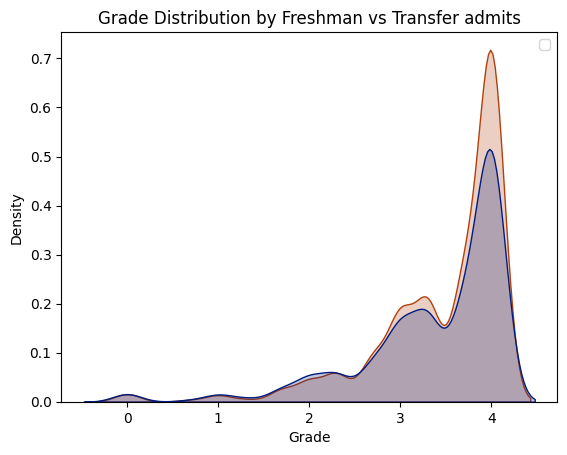

In [350]:
sns.kdeplot(
    data=df_transfer,
    x="gpa", hue="admit_level",
    palette="dark", fill = True
)

plt.xlabel("Grade")
plt.ylabel("Density")
plt.title("Grade Distribution by Freshman vs Transfer admits")
plt.legend()
plt.show()

### Checking Assumptions

In [14]:
df_transfer['admit_level'].value_counts()

admit_level
Freshman    3972
Transfer    3419
Name: count, dtype: int64

In [15]:
transfer =df_transfer[df_transfer['admit_level'] == 'Transfer']['gpa']
freshman = df_transfer[df_transfer['admit_level'] == 'Freshman']['gpa']

# shapiro-Wilk test to check for normality
shapiro_test = stats.shapiro(transfer)

print("Shapiro-Wilk test statistic:", shapiro_test[0])
print("Shapiro-Wilk test p-value:", shapiro_test[1])

alpha = 0.05
if shapiro_test[1] > alpha:
    print("Sample looks normally distributed (fail to reject null hypothesis)")
else:
    print("Sample does not look normally distributed (reject null hypothesis)")

Shapiro-Wilk test statistic: 0.7740646600723267
Shapiro-Wilk test p-value: 0.0
Sample does not look normally distributed (reject null hypothesis)


In [16]:
shapiro_test = stats.shapiro(freshman)

print("Shapiro-Wilk test statistic:", shapiro_test[0])
print("Shapiro-Wilk test p-value:", shapiro_test[1])

alpha = 0.05
if shapiro_test[1] > alpha:
    print("Sample looks normally distributed (fail to reject null hypothesis)")
else:
    print("Sample does not look normally distributed (reject null hypothesis)")

Shapiro-Wilk test statistic: 0.7428950071334839
Shapiro-Wilk test p-value: 0.0
Sample does not look normally distributed (reject null hypothesis)


In [17]:
# perform mann whitney test since data is not normal
stat, p_value = mannwhitneyu(transfer, freshman) 
print('Statistics=%.2f, p=%.2f' % (stat, p_value)) 

alpha = 0.05

if p_value < alpha: 
	print('Reject Null Hypothesis (Significant difference between two samples)') 
else: 
	print('Do not Reject Null Hypothesis (No significant difference between two samples)')


Statistics=6384555.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


In [18]:
# perform mann whitney test since data is not normal
stat, p_value = mannwhitneyu(transfer, freshman, alternative='less') 
print('Statistics=%.2f, p=%.2f' % (stat, p_value)) 

alpha = 0.05
if p_value < alpha: 
	print('Reject Null Hypothesis (Significant difference between two samples)') 
else: 
	print('Do not Reject Null Hypothesis (No significant difference between two samples)')


Statistics=6384555.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


# Toxic Course Combinations

In [330]:
df2 = df_transfer.copy()
df2['course'] = ([row['subj_area_cd'] + row['crs_catlg_no'] for idx, row in df2[['subj_area_cd', 'crs_catlg_no']].iterrows()])
df2['course_combination'] = df2.groupby(['student_id', 'term_code'])['course'].transform(lambda x: ','.join(sorted(x)))

#agg_performance = df2.groupby(['course'])['gpa'].mean().reset_index()
df2['combo_gpa'] = df2.groupby(['student_id', 'course_combination'])['gpa'].transform(lambda x: np.mean(x))

# we focus on pairwise combinations for simplicity
# drop rows with only 1 course relevant to statistics major (ie stats class, ge, ge)
idx = [i for i, j in enumerate(df2['course_combination']) if len(j.split(',')) > 1 ]
df2 = df2.iloc[idx]


In [331]:
more_than_2_major_classes = df2[df2['course_combination'].apply(lambda x: len(x.split(','))) > 2].groupby(['student_id', 'term_code']).agg({'gpa': list, 'course': list}).reset_index()
id = []
term = []
cc = []
c_gpa = []
for index, row in more_than_2_major_classes.iterrows():
    pairs = list(combinations(row['course'], 2))
    for pair in sorted(pairs):
        id.append(row['student_id'])
        term.append(row['term_code'])
        cc.append(str(pair[0])+','+ str(pair[1]))
        gpa_idx_1, gpa_idx_2 = row['course'].index(pair[0]), row['course'].index(pair[1])
        c_gpa.append(np.mean([row['gpa'][gpa_idx_1], row['gpa'][gpa_idx_2]]))


df4 = pd.DataFrame({'student_id': id, 'term_code': term, 'course_combination': cc, 'combo_gpa': c_gpa})
df4.head()
    

,student_id,term_code,course_combination,combo_gpa
0,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,302,"STATS0100C,STATS0101A",2.80
1,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,302,"STATS0100C,STATS0102A",3.30
2,002c63a5-ac38-46a2-a3b7-a0a27b21b92b,302,"STATS0102A,STATS0101A",2.80
3,00977eab-a09f-4a71-b75b-7b47e6fe166d,314,"STATS0100A,STATS0101A",3.65
4,00977eab-a09f-4a71-b75b-7b47e6fe166d,314,"STATS0100A,STATS0102A",3.15


In [332]:
df3 = df2[df2['course_combination'].apply(lambda x: len(x.split(','))) ==2]

df3 = df3[['student_id', 'term_code', 'course_combination', 'combo_gpa']]
df3 = pd.concat([df3, df4])
df3['course_combination'] = [','.join(sorted(i.split(','))) for i in df3['course_combination']]

df3.drop_duplicates(inplace=True)

#for feature importance later
df5 = df3.copy()

# remove course combinations that appear less than 10 times for better visualizations
combo_count = df3['course_combination'].value_counts()
combo_to_remove = combo_count[combo_count < 10].index

df3 = df3[~df3['course_combination'].isin(combo_to_remove)]

In [333]:
combo_mean_gpa = df3.groupby('course_combination')['combo_gpa'].mean().reset_index()
combo_mean_gpa['course_combination'] = combo_mean_gpa['course_combination'].apply(lambda x: x.split(','))
df3['course_combination'] = df3['course_combination'].apply(lambda x: x.split(','))
binary_matrix = df3['course_combination'].str.join('|').str.get_dummies()

In [349]:
print("Course Combinations Associated with Lower Grades:")
course_combinations = combo_mean_gpa.sort_values(by = ['combo_gpa']).head(20)[['course_combination', 'combo_gpa']]
course_combinations

Course Combinations Associated with Lower Grades:


,course_combination,combo_gpa
17,"[MATH0131A, STATS0101C]",2.917857
14,"[MATH0115A, STATS0102A]",2.967857
53,"[STATS0102B, STATS0161 C]",2.985000
39,"[STATS0100C, STATS0102C]",2.986923
15,"[MATH0115A, STATS0102B]",3.050000
29,"[STATS0100B, STATS0101B]",3.054762
27,"[STATS0100A, STATS0102A]",3.056000
20,"[MATH0170E, STATS0101A]",3.108333
31,"[STATS0100B, STATS0102A]",3.111877
54,"[STATS0102B, STATS0183 C]",3.173077


In [335]:
matrix = pd.DataFrame(np.nan, index=binary_matrix.columns, columns=binary_matrix.columns)

for i, row in combo_mean_gpa.iterrows():
    course1 = row['course_combination'][0]
    course2 = row['course_combination'][1]
    matrix.at[course1, course2] = row['combo_gpa']
    matrix.at[course2, course1] = row['combo_gpa'] 

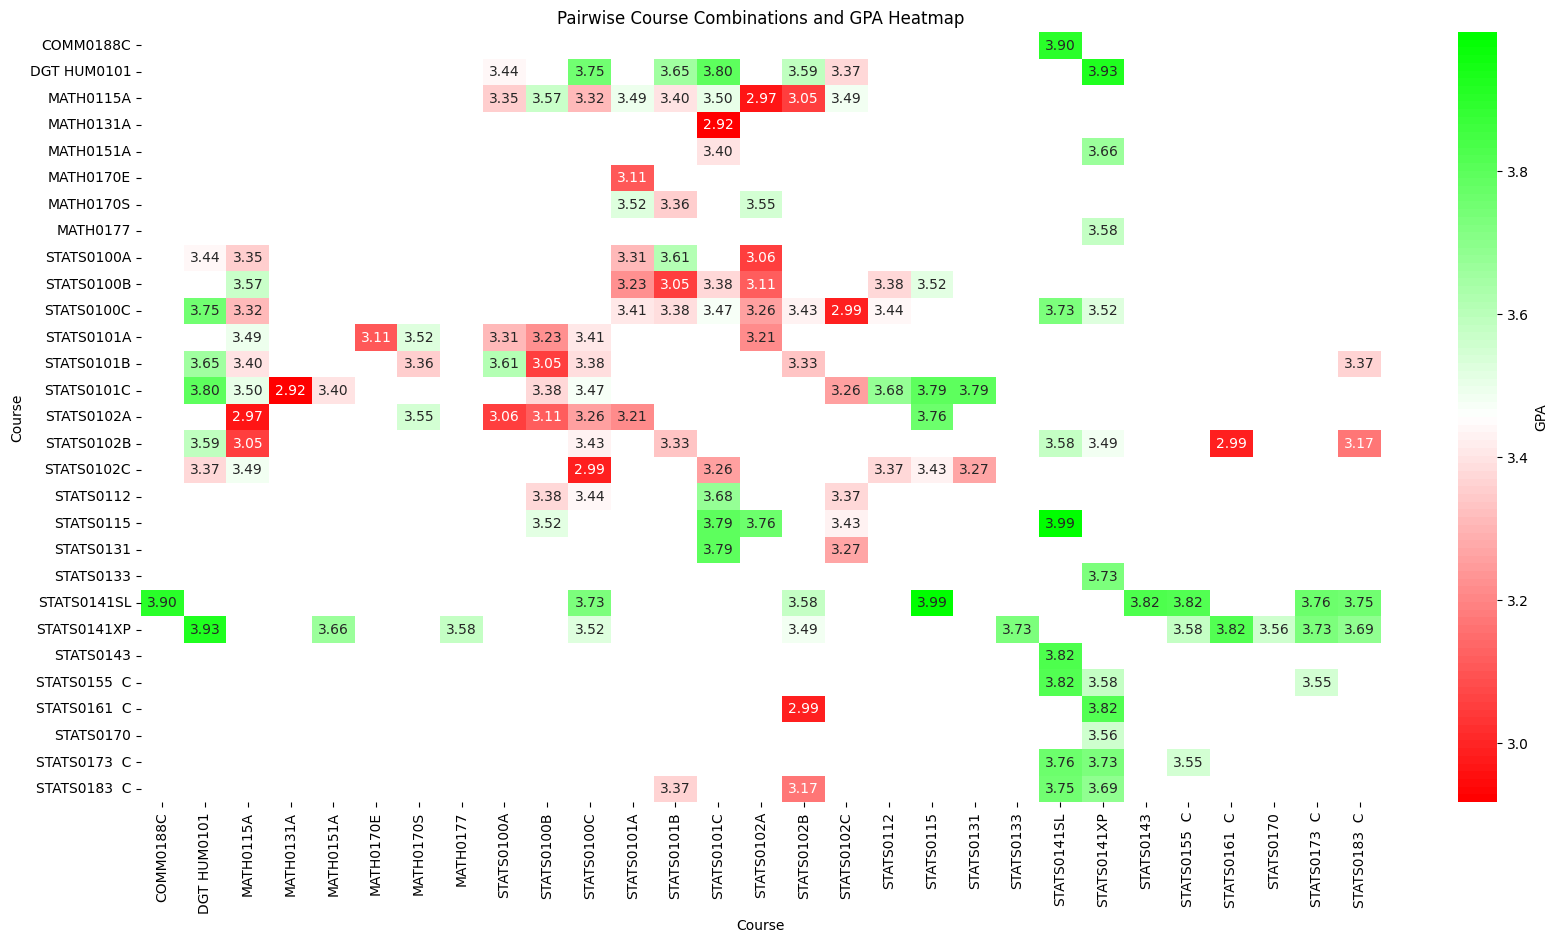

In [336]:
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(20, 10))
colors = [(1, 0, 0),(1, 1, 1),(0, 1, 0)] 
cmap_name = 'custom_cmap'
n_bins = 100  
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
sns.heatmap(matrix, annot=True, cmap = cm, fmt='.2f', cbar_kws={'label': 'GPA'})
plt.title("Pairwise Course Combinations and GPA Heatmap")
plt.xlabel("Course")
plt.ylabel("Course")
plt.show()


In [337]:
# add gpa to binary matrix
binary_matrix['performance_category'] = ['Good' if i > 3.5 else 'Bad' for i in df3['combo_gpa']]
le = LabelEncoder()
binary_matrix['performance_category'] = le.fit_transform(binary_matrix['performance_category'])

/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <function mean at 0x116a2ca40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <function mean at 0x116a2ca40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <

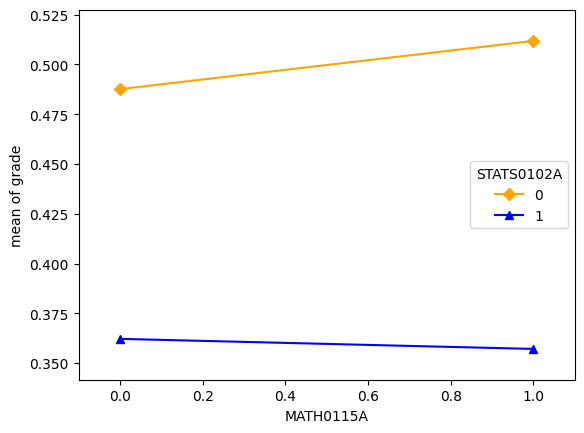

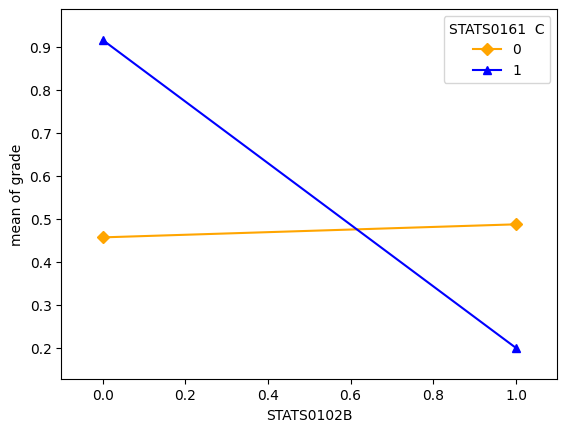

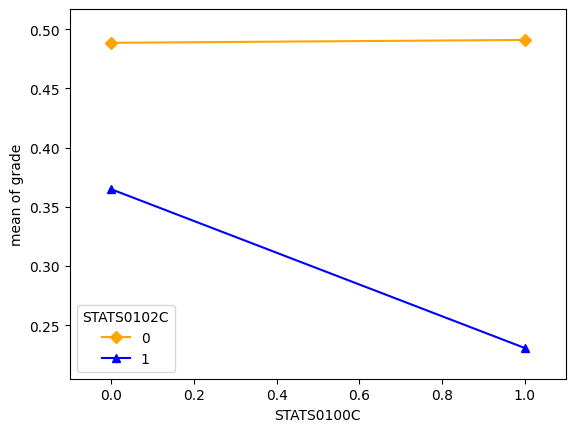

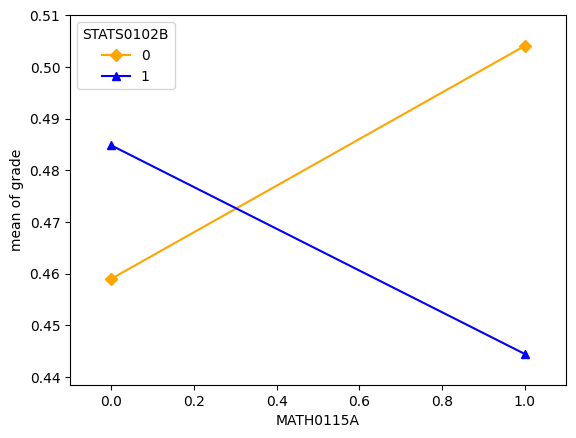

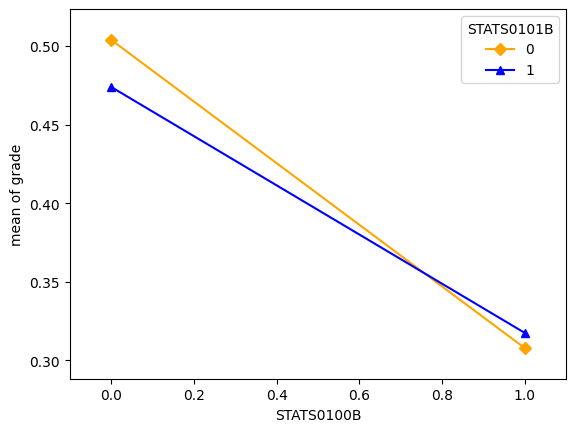

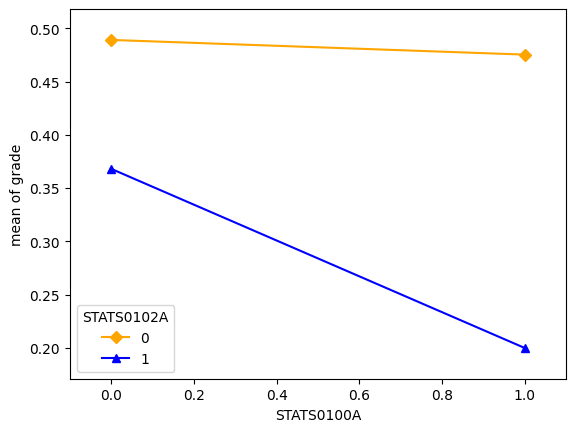

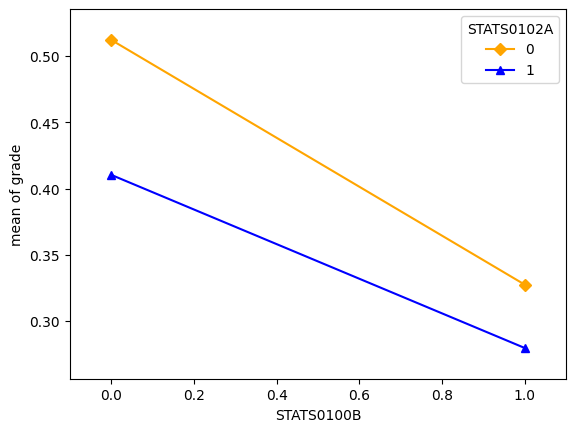

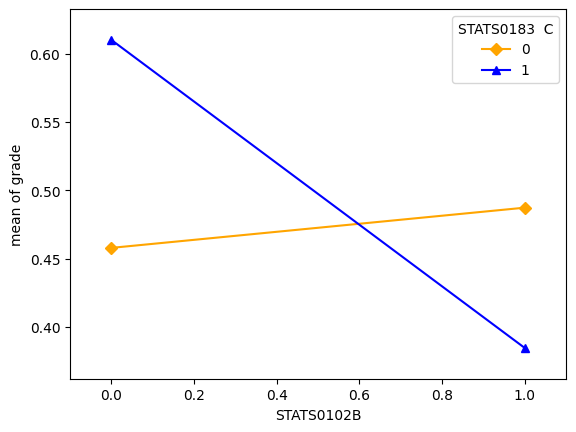

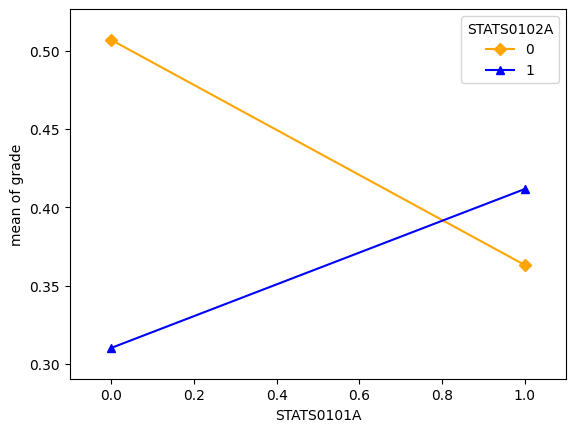

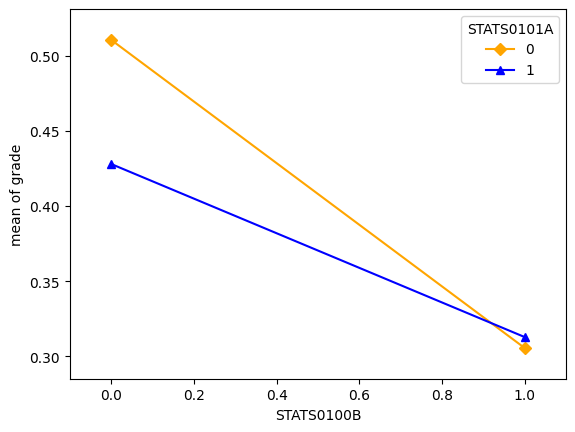

In [338]:
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot


count = 0
hard_course_combinations = []
for i, (course1, course2) in enumerate(course_combinations):
    # plt.subplot(5, 2, i+1)
    grouped = binary_matrix.groupby([course1, course2])["performance_category"].mean().reset_index()

    #filter out course combinations where not all combinations 
    # (ie (course 1 taken, course 2 taken), (course 1 taken, course 2 not taken), (course 1 not taken, course 2 taken), and (course 1 not taken, course 2 not taken)) are present
    if len(grouped) == 4:
        interaction_plot(grouped[course1], grouped[course2], grouped['performance_category'], 
                colors=['orange','blue'], markers=['D','^'], ylabel='grade', xlabel=course1)
        count +=1
        hard_course_combinations.append([course1,course2])
    if count == 10:
        break
plt.show()

We can see from visual inspection that there are interaction effects with all the proposed toxic course combinations. For all the combinations, taking both courses on the same term leads to worse grades. We now test if these interactions are statistically significant. 

In [339]:
for i, (course1, course2) in enumerate(hard_course_combinations):
    
    binary_matrix["Course_A"] = binary_matrix[course1].astype("category")
    binary_matrix["Course_B"] = binary_matrix[course2].astype("category")

    model = smf.ols("performance_category ~ Course_A + Course_B + Course_A:Course_B", data=binary_matrix).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print('Interaction between ' + course1 + ', ' + course2 + ':')
    print(anova_table)
    if(anova_table['PR(>F)'].loc['Course_A:Course_B'] < 0.05):
        print('Reject null hypothesis. The interaction between ' + course1 + ' and '+ course2 +' is statistically significant.')
    else:
        print('Accept null hypothesis. The interaction between ' + course1 + ' and '+ course2 +' is not statistically significant.')
    print('\n')


Interaction between MATH0115A, STATS0102A:
                       sum_sq      df          F        PR(>F)
Course_A             0.061176     1.0   0.248030  6.184943e-01
Course_B             9.161100     1.0  37.142402  1.205829e-09
Course_A:Course_B    0.010553     1.0   0.042784  8.361431e-01
Residual           951.321466  3857.0        NaN           NaN
Accept null hypothesis. The interaction between MATH0115A and STATS0102A is not statistically significant.


Interaction between STATS0102B, STATS0161  C:
                       sum_sq      df          F    PR(>F)
Course_A             0.295517     1.0   1.194191  0.274554
Course_B             1.948904     1.0   7.875569  0.005036
Course_A:Course_B    3.894301     1.0  15.736969  0.000074
Residual           954.460853  3857.0        NaN       NaN
Reject null hypothesis. The interaction between STATS0102B and STATS0161  C is statistically significant.


Interaction between STATS0100C, STATS0102C:
                       sum_sq      df   

According to our 2 way ANOVA tests, the interaction between STATS0102B and STATS0161  C, STATS0100C and STATS0102C, STATS0102B and STATS0183  C , STATS0101A and STATS0102A, and STATS0100B and STATS0101A are statistically significant. 

## Feature importance

We now fit the data to a random forest to obtain its feature importance scores as a way to gain more insight about the contributions of each course to student performance. We use random forests as it is robust against sparse data, and provides more reliable feature importance scores as it aggregates the results of multiple models. Higher feature importance scores suggest that the course has a stronger impact on GPA.  

In [340]:
# get data from those with 1 class that contributes to major, since we want to observe individual course's effects on gpa
df2 = df_transfer.copy()
df2['course'] = ([row['subj_area_cd'] + row['crs_catlg_no'] for idx, row in df2[['subj_area_cd', 'crs_catlg_no']].iterrows()])
df2['course_combination'] = df2.groupby(['student_id', 'term_code'])['course'].transform(lambda x: ','.join(sorted(x)))

df2['combo_gpa'] = df2.groupby(['student_id', 'course_combination'])['gpa'].transform(lambda x: np.mean(x))

idx = [i for i, j in enumerate(df2['course_combination']) if len(j.split(',')) == 1 ]
df2 = df2.iloc[idx]
df2 = df2[['student_id', 'term_code', 'course_combination', 'combo_gpa']]

In [341]:
df5 = pd.concat([df5, df2])
df5['course_combination'] = df5['course_combination'].apply(lambda x: x.split(','))
binary_matrix = df5['course_combination'].str.join('|').str.get_dummies()
binary_matrix['performance_category'] = ['Good' if i > 3.5 else 'Bad' for i in df5['combo_gpa']]

In [342]:
le = LabelEncoder()
binary_matrix['performance_category'] = le.fit_transform(binary_matrix['performance_category'])

In [343]:
X = binary_matrix.drop(columns=['performance_category'])
y = binary_matrix['performance_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [344]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [5, 10, 20]   
}

rf = RandomForestClassifier(random_state=42, criterion= 'entropy')
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y)

best_rf = grid_search.best_estimator_

In [345]:
feature_importances = best_rf.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

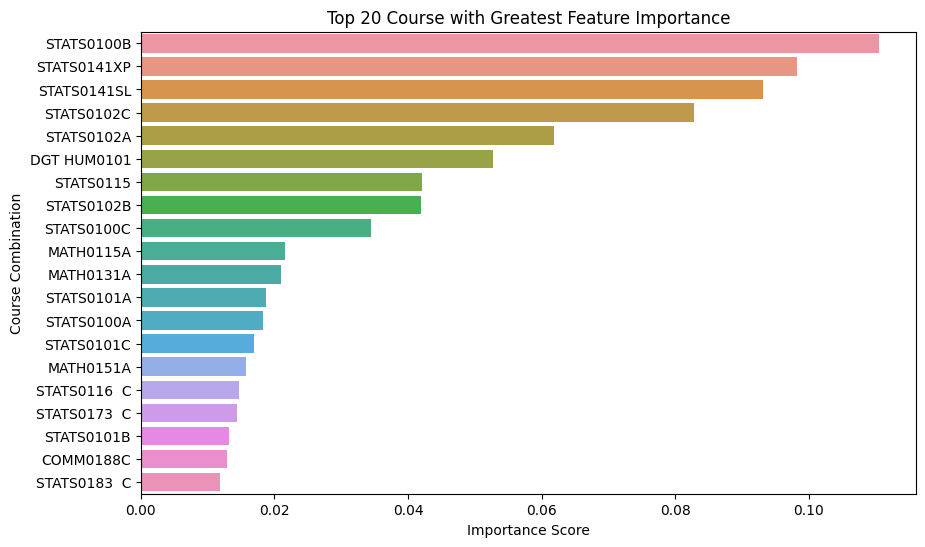

In [346]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(20))
plt.title("Top 20 Course with Greatest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Course Combination")
plt.show()

## Feature Significance 

We now fit the data to a logistic regression model with an L1 regularizer to obtain information on how each course affects grades. Negative coefficients suggest that taking the course would negatively affect grades whereas positive coefficients suggest that taking the course would increase the likelihood of getting a better grade. 

In [347]:
lr = LogisticRegression(penalty= 'l1', solver='liblinear')
lr.fit(X, y)

significance = lr.coef_[0]
significance_df = pd.DataFrame({'feature': X.columns, 'importance': significance})

print("Top Courses Associated with Lower Grades:")
hard_courses = significance_df.sort_values(by = ['importance'], ascending= True).head(10)  # most negative coefficients
hard_courses

Top Courses Associated with Lower Grades:


,feature,importance
37,MATH0182,-1.578393
49,STATS0102C,-1.338157
42,STATS0100B,-1.248453
17,MATH0135,-1.167014
30,MATH0171,-1.130503
3,ECON0144,-1.085889
28,MATH0170E,-0.939794
57,STATS0143,-0.872327
47,STATS0102A,-0.829985
27,MATH0170B,-0.823253


In [348]:
 # most positive coefficients
print("\nTop Courses Associated with Higher Grades:")
easy_courses = significance_df.sort_values(by = ['importance'], ascending= False).head(10)
easy_courses


Top Courses Associated with Higher Grades:


,feature,importance
52,STATS0116 C,1.110121
55,STATS0141SL,0.932680
22,MATH0156,0.768524
51,STATS0115,0.711800
1,DGT HUM0101,0.512086
54,STATS0133,0.436742
25,MATH0168,0.415585
14,MATH0131B,0.410051
56,STATS0141XP,0.394328
20,MATH0151B,0.377294
